# Import necessary libraries

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import numpy as np
import scipy


# Load bioactivity data

In [2]:
df = pd.read_csv("data/bioactivity_data_curated.csv")
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,Active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,Active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,Inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,Active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,Active
...,...,...,...,...
6637,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0,Inactive
6638,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0,Inactive
6639,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.0,Intermediate
6640,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0,Inactive


In [3]:
df.standard_value.describe()

count    6.642000e+03
mean     1.026835e+05
std      8.884597e+05
min      0.000000e+00
25%      1.592500e+02
50%      2.600000e+03
75%      1.713000e+04
max      4.960000e+07
Name: standard_value, dtype: float64

In [4]:
df = df[df['standard_value'] != 0.0].reset_index(drop=True)


In [5]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,Active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,Active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,Inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,Active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,Active
...,...,...,...,...
6636,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0,Inactive
6637,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0,Inactive
6638,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.0,Intermediate
6639,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0,Inactive


# Calculate lipinsiki descriptor

Lipsinki descriptor comes from Lipsinki's rule of five.
Lipinski's rule of five is a concept frequently used in drug discovery. This rule helps to predict if a biologically active molecule is likely to have the chemical and physical properties to be orally bioavailable. The Lipinski rule bases pharmacokinetic drug properties such as absorption, distribution, metabolism and excretion on specific physicochemical properties such as:

1. No more than 5 hydrogen bond donors

2. No more than 10 hydrogen bond acceptors

3. Molecular mass less than 500 Da

4. Partition coefficient not greater than 5

According to Lipinski's rule of five, an orally active drug can have no more than one violation of these conditions.
The name "rule of five" comes from the fact that all the conditions have multiples of five as the determinant conditions.


In [6]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW(Molecular Weight)","LogP(Solubility)","NumHDonors(Hydrogen donors)","NumHAcceptors(Hydrogen acceptors)"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [7]:
df_lipinski = lipinski(df.canonical_smiles) 

In [8]:
df_lipinski


,MW(Molecular Weight),LogP(Solubility),NumHDonors(Hydrogen donors),NumHAcceptors(Hydrogen acceptors)
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
6636,301.298,2.0110,4.0,6.0
6637,105.093,-1.6094,3.0,3.0
6638,401.474,2.9571,3.0,5.0
6639,387.447,2.6149,4.0,5.0


In [9]:
df_combined = pd.concat([df,df_lipinski],axis=1)

In [10]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW(Molecular Weight),LogP(Solubility),NumHDonors(Hydrogen donors),NumHAcceptors(Hydrogen acceptors)
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,Active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,Active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,Inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,Active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,Active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
6636,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0,Inactive,301.298,2.0110,4.0,6.0
6637,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0,Inactive,105.093,-1.6094,3.0,3.0
6638,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.0,Intermediate,401.474,2.9571,3.0,5.0
6639,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0,Inactive,387.447,2.6149,4.0,5.0


In [11]:
df_combined.standard_value.describe()

count    6.641000e+03
mean     1.026990e+05
std      8.885257e+05
min      5.000000e-06
25%      1.600000e+02
50%      2.600000e+03
75%      1.714000e+04
max      4.960000e+07
Name: standard_value, dtype: float64

In [12]:
df_combined2 = df_combined.copy()

# capping  standard value to 1e9 and converting IC50 to pIC50


In [13]:
df_combined['standard_value'] = df_combined['standard_value'].clip(upper=10e9)
df_combined['pIC50'] = -np.log10(df_combined.standard_value * 1e-9)


In [14]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW(Molecular Weight),LogP(Solubility),NumHDonors(Hydrogen donors),NumHAcceptors(Hydrogen acceptors),pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,Active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,Active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,Inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,Active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,Active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...,...
6636,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0,Inactive,301.298,2.0110,4.0,6.0,4.337242
6637,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0,Inactive,105.093,-1.6094,3.0,3.0,4.416688
6638,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.0,Intermediate,401.474,2.9571,3.0,5.0,5.767004
6639,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0,Inactive,387.447,2.6149,4.0,5.0,5.000000


In [ ]:
df_combined.pIC50.describe()

In [23]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis = 1)
        
    return x

In [19]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis = 1)
        
    return x
    

In [20]:
df_combined2

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW(Molecular Weight),LogP(Solubility),NumHDonors(Hydrogen donors),NumHAcceptors(Hydrogen acceptors),standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,Active,312.325,2.8032,0.0,6.0,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,Active,376.913,4.5546,0.0,5.0,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,Inactive,426.851,5.3574,0.0,5.0,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,Active,404.845,4.7069,0.0,5.0,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,Active,346.334,3.0953,0.0,6.0,800.0
...,...,...,...,...,...,...,...,...,...
6636,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0,Inactive,301.298,2.0110,4.0,6.0,46000.0
6637,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0,Inactive,105.093,-1.6094,3.0,3.0,38310.0
6638,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.0,Intermediate,401.474,2.9571,3.0,5.0,1710.0
6639,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0,Inactive,387.447,2.6149,4.0,5.0,10000.0


In [21]:
df_norm = norm_value(df_combined2)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW(Molecular Weight),LogP(Solubility),NumHDonors(Hydrogen donors),NumHAcceptors(Hydrogen acceptors),standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,Active,312.325,2.8032,0.0,6.0,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,Active,376.913,4.5546,0.0,5.0,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,Inactive,426.851,5.3574,0.0,5.0,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,Active,404.845,4.7069,0.0,5.0,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,Active,346.334,3.0953,0.0,6.0,800.0
...,...,...,...,...,...,...,...,...
6636,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,Inactive,301.298,2.0110,4.0,6.0,46000.0
6637,CHEMBL11298,N[C@@H](CO)C(=O)O,Inactive,105.093,-1.6094,3.0,3.0,38310.0
6638,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,Intermediate,401.474,2.9571,3.0,5.0,1710.0
6639,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,Inactive,387.447,2.6149,4.0,5.0,10000.0


In [24]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW(Molecular Weight),LogP(Solubility),NumHDonors(Hydrogen donors),NumHAcceptors(Hydrogen acceptors),pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,Active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,Active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,Inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,Active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,Active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6636,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,Inactive,301.298,2.0110,4.0,6.0,4.337242
6637,CHEMBL11298,N[C@@H](CO)C(=O)O,Inactive,105.093,-1.6094,3.0,3.0,4.416688
6638,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,Intermediate,401.474,2.9571,3.0,5.0,5.767004
6639,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,Inactive,387.447,2.6149,4.0,5.0,5.000000


In [25]:
df_final.pIC50.describe()

count    6641.000000
mean        5.801767
std         1.558782
min         1.304518
25%         4.765989
50%         5.585027
75%         6.795880
max        14.301030
Name: pIC50, dtype: float64

In [26]:
df_combined.pIC50.describe()

count    6641.000000
mean        5.801767
std         1.558782
min         1.304518
25%         4.765989
50%         5.585027
75%         6.795880
max        14.301030
Name: pIC50, dtype: float64

In [27]:
df_combined.drop(columns = ['standard_value'],inplace = True)

In [28]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW(Molecular Weight),LogP(Solubility),NumHDonors(Hydrogen donors),NumHAcceptors(Hydrogen acceptors),pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,Active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,Active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,Inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,Active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,Active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6636,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,Inactive,301.298,2.0110,4.0,6.0,4.337242
6637,CHEMBL11298,N[C@@H](CO)C(=O)O,Inactive,105.093,-1.6094,3.0,3.0,4.416688
6638,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,Intermediate,401.474,2.9571,3.0,5.0,5.767004
6639,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,Inactive,387.447,2.6149,4.0,5.0,5.000000


In [29]:
df_final_3class = df_combined.copy()
df_final_2class = df_combined[df_combined.bioactivity_class != "Intermediate"]

In [30]:
df_final_3class.to_csv('data/bioactivity_data_3class_pIC50.csv')

In [31]:
df_final_2class.to_csv('data/bioactivity_data_2class_pIC50.csv')

# Import libraries for plot

In [32]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

# Frequency plot of the bioactivity classes 

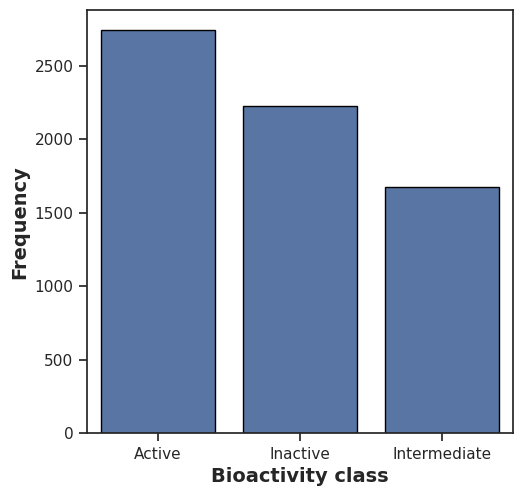

In [33]:
plt.figure(figsize =(5.5,5.5))
sns.countplot(x='bioactivity_class',data= df_final_3class, edgecolor = 'black')

plt.xlabel("Bioactivity class", fontsize = 14, fontweight ='bold')
plt.ylabel('Frequency', fontsize = 14,  fontweight = 'bold')
plt.savefig(f"results/plot_bioactivity_3_class.pdf")

plt.show()


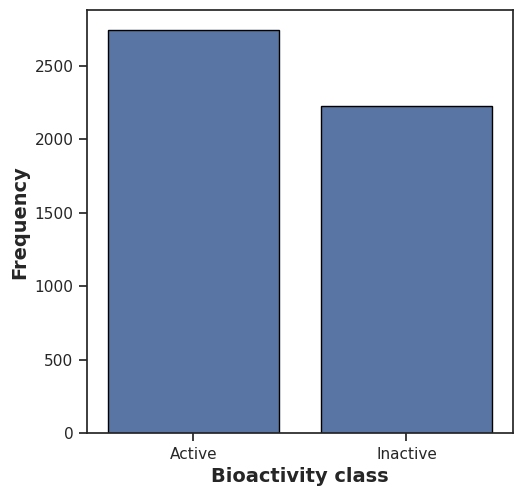

In [34]:
plt.figure(figsize =(5.5,5.5))
sns.countplot(x='bioactivity_class',data= df_final_2class,edgecolor = 'black')

plt.xlabel("Bioactivity class", fontsize = 14, fontweight ='bold')
plt.ylabel('Frequency', fontsize = 14,  fontweight = 'bold')
plt.savefig(f"results/plot_bioactivity_2_class.pdf")

plt.show()
#plt.savefig('plot_bioactivity_2_class.pdf')

# Scatterplot between MW vs Log50

<function matplotlib.pyplot.show(close=None, block=None)>

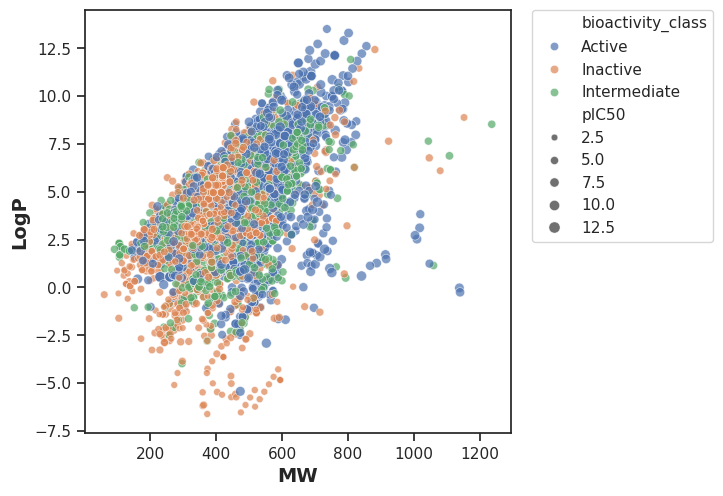

In [35]:
plt.figure(figsize=(5.5,5.5))
sns.scatterplot(
    x="MW(Molecular Weight)", 
    y="LogP(Solubility)", 
    data=df_final_3class,
    size = 'pIC50',
    hue = "bioactivity_class",
    alpha = 0.7
)
plt.xlabel('MW', fontsize = 14, fontweight ='bold')
plt.ylabel('LogP', fontsize =14, fontweight ='bold')
plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_MW_vs_LogP_3class.pdf')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

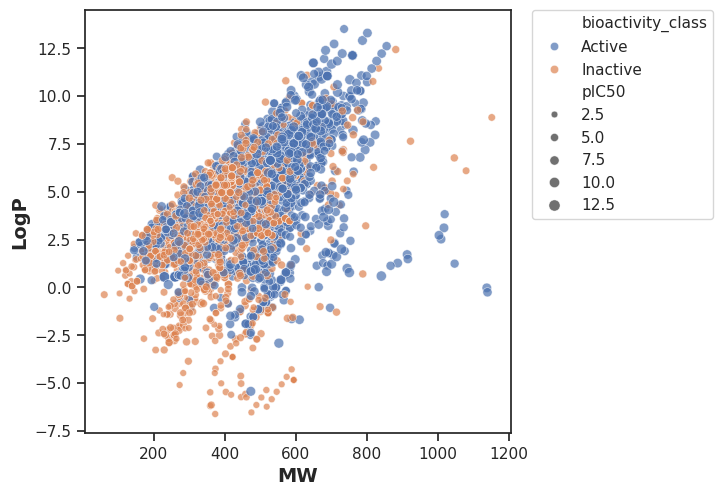

In [36]:
plt.figure(figsize=(5.5,5.5))
sns.scatterplot(
    x="MW(Molecular Weight)", 
    y="LogP(Solubility)", 
    data=df_final_2class,
    size = 'pIC50',
    hue = "bioactivity_class",
    alpha = 0.7
)
plt.xlabel('MW', fontsize = 14, fontweight ='bold')
plt.ylabel('LogP', fontsize =14, fontweight ='bold')
plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_MW_vs_LogP_2class.pdf')
plt.show


# Box plots


# pIC50

<function matplotlib.pyplot.show(close=None, block=None)>

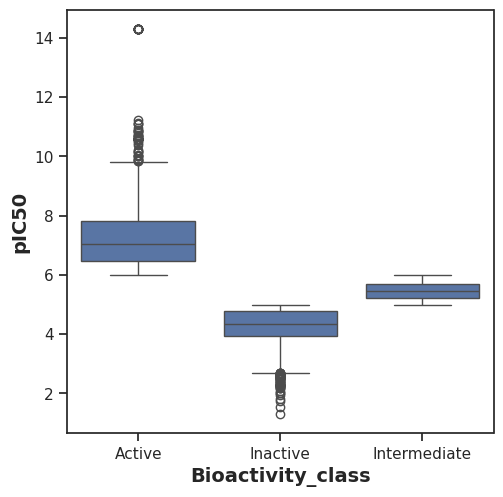

In [37]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="pIC50",
    data = df_final_3class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('pIC50', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_ic50_3class.pdf')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

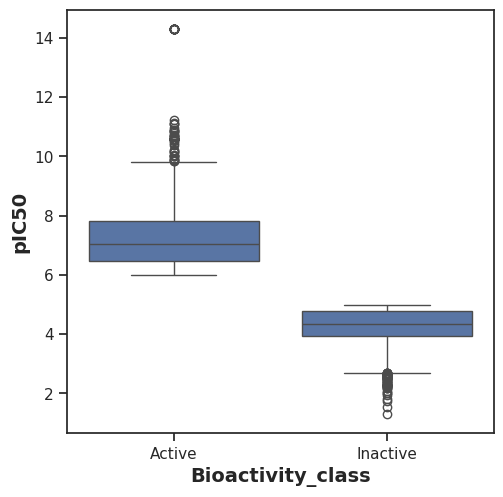

In [38]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="pIC50",
    data = df_final_2class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('pIC50', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_ic50_2class.pdf')
plt.show

# MW

<function matplotlib.pyplot.show(close=None, block=None)>

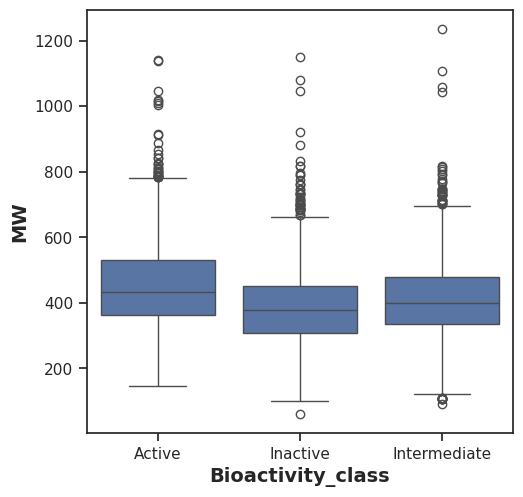

In [39]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="MW(Molecular Weight)",
    data = df_final_3class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('MW', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_MW_3class.pdf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

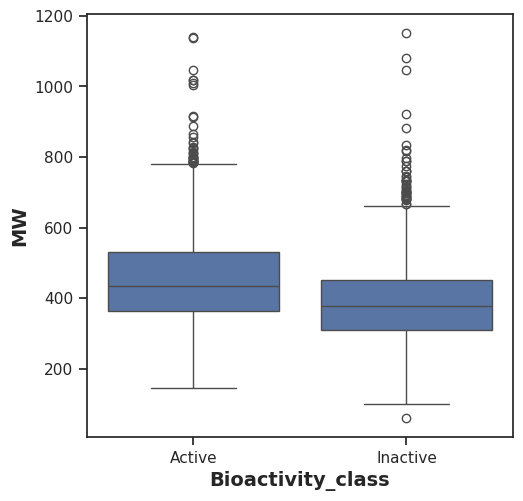

In [40]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="MW(Molecular Weight)",
    data = df_final_2class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('MW', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_MW_2class.pdf')
plt.show

# Log P

<function matplotlib.pyplot.show(close=None, block=None)>

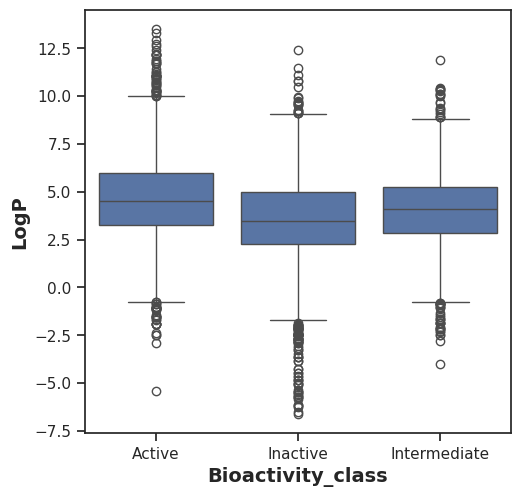

In [41]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="LogP(Solubility)",
    data = df_final_3class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('LogP', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_LogP_3class.pdf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

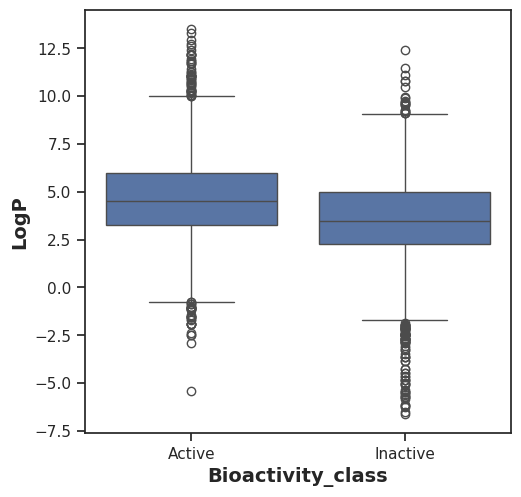

In [42]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="LogP(Solubility)",
    data = df_final_2class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('LogP', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_LogP_2class.pdf')
plt.show

# NumHdonors

<function matplotlib.pyplot.show(close=None, block=None)>

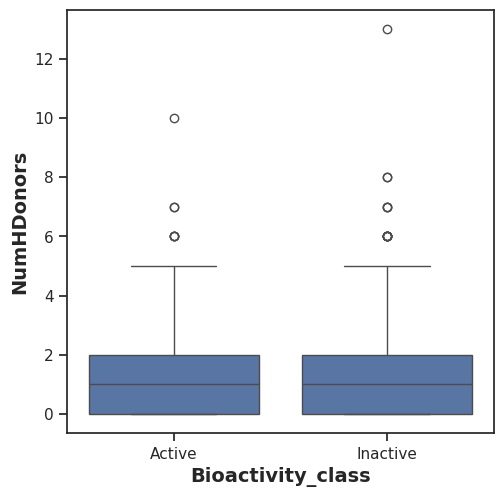

In [43]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="NumHDonors(Hydrogen donors)",
    data = df_final_2class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('NumHDonors', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_NumHDonors_2class.pdf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

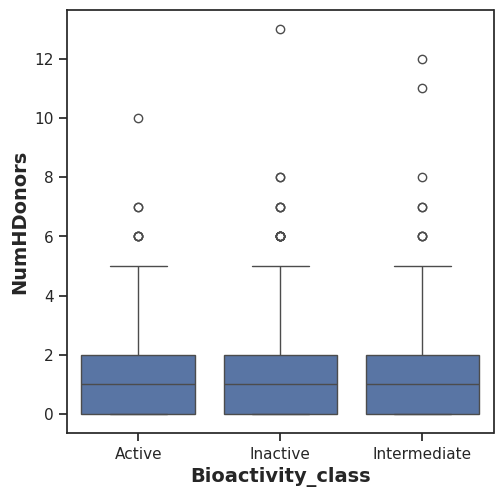

In [44]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="NumHDonors(Hydrogen donors)",
    data = df_final_3class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('NumHDonors', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_NumHDonors_3class.pdf')
plt.show

# NumHAcceptors

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="NumHAcceptors(Hydrogen acceptors)",
    data = df_final_2class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('NumHAcceptors', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_NumHacceptors_2class.pdf')
plt.show

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(
    x="bioactivity_class", 
    y="NumHAcceptors(Hydrogen acceptors)",
    data = df_final_3class
)
plt.xlabel('Bioactivity_class', fontsize = 14, fontweight ='bold')
plt.ylabel('NumHAcceptors', fontsize =14, fontweight ='bold')
#plt.legend(bbox_to_anchor = (1.05,1),loc =2, borderaxespad = 0)
plt.savefig(f'results/plot_NumHacceptors_3class.pdf')
plt.show

In [ ]:
df_final_2class

# Statistical test

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_final_2class[selection]
  active = df[df['bioactivity_class'] == 'Active']
  active = active[descriptor]
  print(len(active))


  selection = [descriptor, 'bioactivity_class']
  df = df_final_2class[selection]
  inactive = df[df['bioactivity_class'] == 'Inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

In [ ]:
mannwhitney('MW(Molecular Weight)')

In [ ]:
mannwhitney('LogP(Solubility)')

In [ ]:
mannwhitney('NumHDonors(Hydrogen donors)')

In [ ]:
mannwhitney('NumHAcceptors(Hydrogen acceptors)')